In [1]:
import missingno as msno
import sys
import os
import importlib


# Ajoute le chemin vers le dossier parent de Utils
sys.path.append(os.path.abspath(os.path.join("..", "..")))

import Utils.helpers as util


In [2]:
import p02_data_transformation.Scripts.transform_etl as transform_etl
import p01_data_ingestion.scripts.ingest_api_to_db as ingest_to_db

from p01_data_ingestion.scripts.ingest_api_to_db import (save_list_on_bigquery)
from p02_data_transformation.Scripts.transform_etl import (pokemon_movies_cleaning, pokemons_cleaning, transform_pokemon, get_spark_config, get_pokemon_movies_schema, get_pokemons_schema)
importlib.reload(util)
importlib.reload(transform_etl)
importlib.reload(ingest_to_db)

<module 'p01_data_ingestion.scripts.ingest_api_to_db' from 'c:\\Users\\Aboudalla\\Documents\\Data Engineer\\Workspace\\Portfolio\\01_Data_Engineer_Portfolio\\p01_data_ingestion\\scripts\\ingest_api_to_db.py'>

In [3]:
spark = get_spark_config()
(pokemons_movies, pokemons, x, y) = transform_pokemon(spark)

2025-09-14 02:26:06,631 - INFO - 1302


<Axes: >

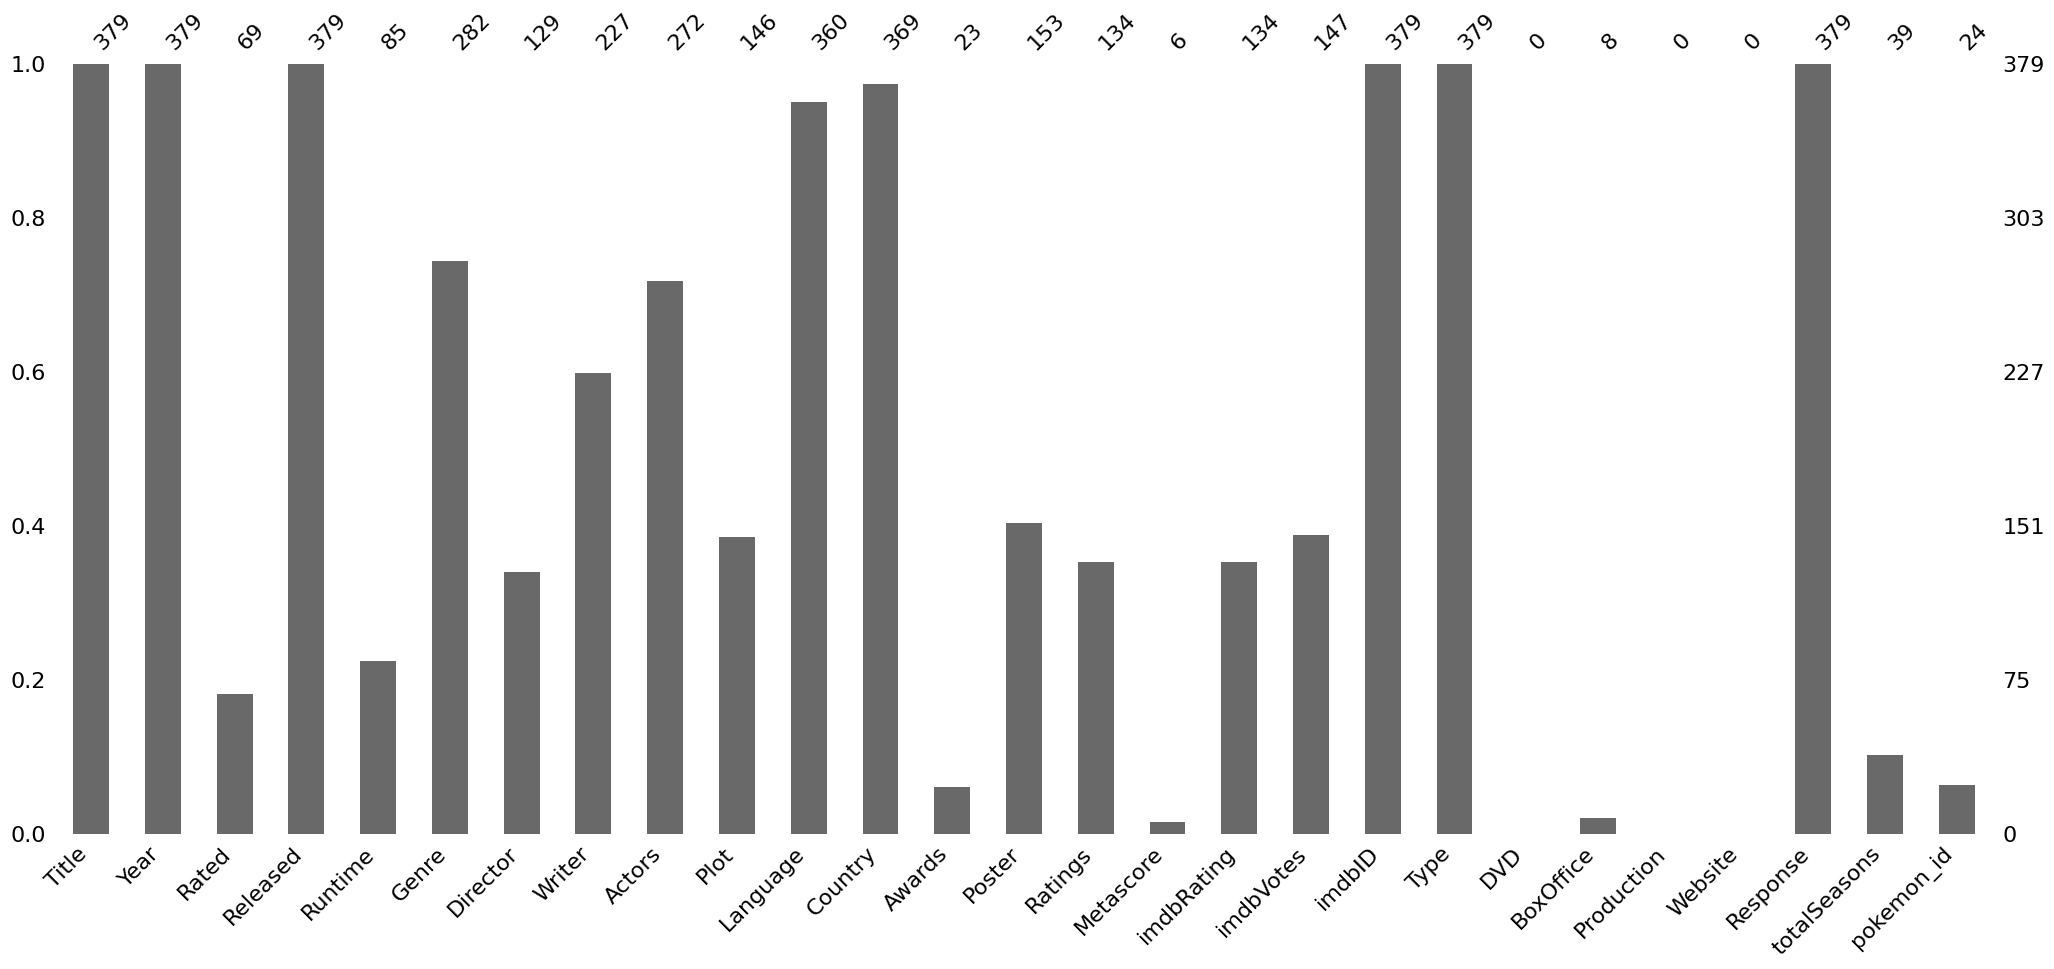

In [4]:
pokemons_movies_cleaned = pokemon_movies_cleaning(pokemons_movies)
#print(pokemons_movies_cleaned.head(2))

msno.bar(pokemons_movies_cleaned)

In [5]:
pokemons_cleaned = pokemons_cleaning(pokemons)

2025-09-14 02:29:53,260 - INFO - past_abilities = []
2025-09-14 02:29:53,260 - INFO - past_abilities = []
2025-09-14 02:29:53,261 - INFO - past_abilities = [{'abilities': [{'ability': None, 'is_hidden': True, 'slot': 3}], 'generation': {'name': 'generation-iv', 'url': 'https://pokeapi.co/api/v2/generation/4/'}}, {'abilities': [{'ability': None, 'is_hidden': False, 'slot': 2}], 'generation': {'name': 'generation-v', 'url': 'https://pokeapi.co/api/v2/generation/5/'}}]
2025-09-14 02:29:53,262 - INFO - past_abilities 0 = {'abilities': [{'ability': None, 'is_hidden': True, 'slot': 3}], 'generation': {'name': 'generation-iv', 'url': 'https://pokeapi.co/api/v2/generation/4/'}}
2025-09-14 02:29:53,263 - INFO - past_abilities 1 = {'abilities': [{'ability': None, 'is_hidden': False, 'slot': 2}], 'generation': {'name': 'generation-v', 'url': 'https://pokeapi.co/api/v2/generation/5/'}}
2025-09-14 02:29:53,264 - INFO - past_abilities = [{'abilities': [{'ability': None, 'is_hidden': True, 'slot': 3}

In [6]:
pokemon_movies_schema = get_pokemon_movies_schema(pokemons_movies_cleaned)

print(pokemon_movies_schema)

ingest_to_db.save_list_on_bigquery(data=pokemons_movies_cleaned, my_table="dataengineer-471201.pokemon_ds.pokemon_movies", schema=pokemon_movies_schema)

[SchemaField('Title', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Year', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('Rated', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Released', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Runtime', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Genre', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Director', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Writer', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Actors', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Plot', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Language', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Country', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Awards', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Poster', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('Ratings', 'FLOAT', 'NULLABLE', None, None, (),

True

In [7]:
pokemon_schema = get_pokemons_schema(pokemons_cleaned)

print(pokemon_schema)

ingest_to_db.save_list_on_bigquery(data=pokemons_cleaned, my_table="dataengineer-471201.pokemon_ds.pokemons", schema=pokemon_schema)

[SchemaField('abilities', 'RECORD', 'REPEATED', None, None, (SchemaField('is_hidden', 'BOOLEAN', 'NULLABLE', None, None, (), None), SchemaField('slot', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('ability', 'RECORD', 'NULLABLE', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('url', 'STRING', 'NULLABLE', None, None, (), None)), None)), None), SchemaField('base_experience', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('cries', 'RECORD', 'REPEATED', None, None, (SchemaField('latest', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('legacy', 'STRING', 'NULLABLE', None, None, (), None)), None), SchemaField('forms', 'RECORD', 'REPEATED', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('url', 'STRING', 'NULLABLE', None, None, (), None)), None), SchemaField('game_indices', 'RECORD', 'REPEATED', None, None, (SchemaField('game_index', 'INTEGER', 'NULLABLE', None, None, (), Non

True